In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import sys

sys.path.append("../")

from src.detection.prediction_utils import choose_model, filter_predictions, visualize_boxes
from src.slides_utils.slides_utils import predict_tiles
from src.line_detection.hough import get_pairs
from src.ocr_utils.ocr import get_ocr_model, predict_ocr, generate_db

In [3]:
from PIL import Image
from torchvision import transforms as T

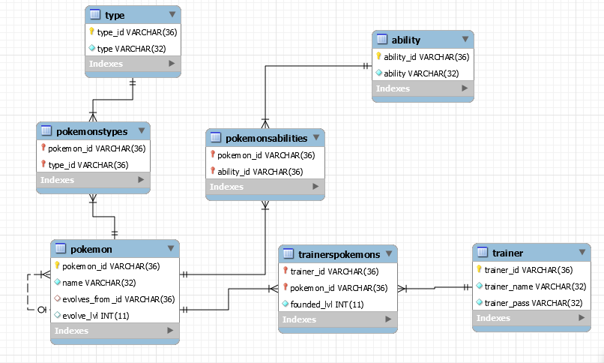

In [4]:
# img_path = '/home/nacho/TFI-Cazcarra/data/imagenes_diagramas/ERDiagramsMySQL-9.png'
img_path = '/home/nacho/TFI-Cazcarra/data/images_testing/test1.png'
img = Image.open(img_path).convert("RGB")

min_size = 600
max_size = 1333

transform = T.Compose([T.ToTensor()])
img_tensor = transform(img)
img.resize((int(s*0.75) for s in img.size))

## Predicciones sobre los objetos

In [5]:
model_tablas = choose_model(model_name="retinanet", object_to_predict="tablas")

Por ahora los modelos están en path diferentes. TODO: Habría que unificar.


In [6]:
model_cardinalidades = choose_model(model_name="retinanet", object_to_predict="cardinalidades")

Por ahora los modelos están en path diferentes. TODO: Habría que unificar.


In [7]:
tablas_pred = model_tablas([img_tensor])[1][0]
tablas_boxes, tablas_scores = filter_predictions(tablas_pred, nms_threshold=0.5)

In [8]:
cardinalidades_pred = predict_tiles(img, model=model_cardinalidades, is_yolo=False, transform=transform)
cardinalidades_boxes, cardinalidades_scores = filter_predictions(cardinalidades_pred, nms_threshold=0.5, 
                                                                 score_threshold=0.25)

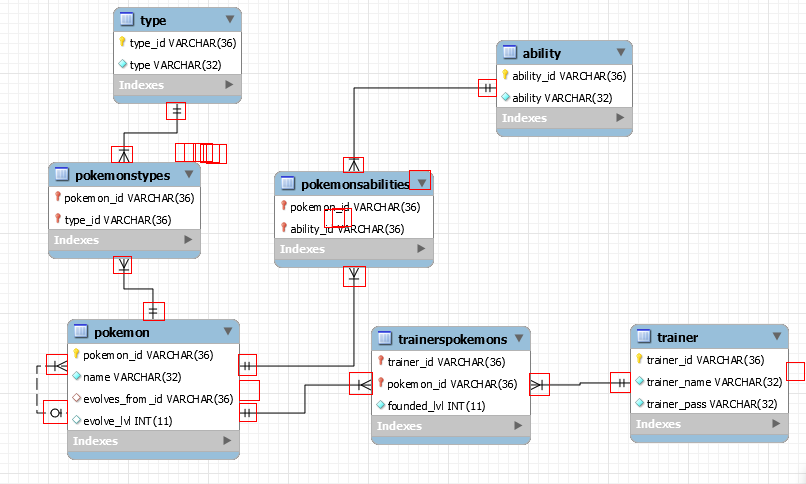

In [9]:
visualize_boxes(img, cardinalidades_boxes)

## Predicciones sobre las líneas

In [38]:
conexiones = get_pairs(tablas_boxes, cardinalidades_boxes, img=img, plot=False)

## OCR

In [12]:
ocr = get_ocr_model(det_algo="db", rec_algo="svtr", lang="en")

In [37]:
tablas_boxes_int = tablas_boxes.detach().numpy().astype(int)
all_tables, tables_names = predict_ocr(img=img, tablas=tablas_boxes_int, ocr_model=ocr, scale_percent=100)

In [40]:
code = generate_db(conexiones, all_tables, tables_names, lang="en")
print(code)

Relationship between ('pokemon', 'pokemon') could not be established.
Please check that the attributes are in the correct format.

 CREATE TABLE type ( 
   type_id VARCHAR(36),
   type VARCHAR(32),
   PRIMARY KEY (type_id) 
 ); 
 CREATE TABLE ability ( 
   ability_id VARCHAR(36),
   ability VARCHAR(32),
   PRIMARY KEY (ability_id) 
 ); 
 CREATE TABLE trainerspokemons ( 
   trainer_id VARCHAR(36),
   poem_on_id VARCHAR(36),
   founded_ BIGINT(11),
   PRIMARY KEY (trainer_id, poem_on_id) 
 ); 
 CREATE TABLE trainer ( 
   trainer_id VARCHAR(36),
   trainer_name VARCHAR(32),
   trainer_pass VARCHAR(32),
   PRIMARY KEY (trainer_id) 
 ); 
 CREATE TABLE pokemonstypes ( 
   poem_on_id VARCHAR(36),
   type_id VARCHAR(36),
   PRIMARY KEY (poem_on_id, type_id) 
 ); 
 CREATE TABLE pokemon ( 
   poem_on_id VARCHAR(36),
   name VARCHAR(32),
   evolves_from_id VARCHAR(36),
   evolve_v INT(11),
   PRIMARY KEY (evolves_from_id, poem_on_id) 
 ); 
 CREATE TABLE pokemonsabilities ( 
   poem_on_id VARCHAR(